Projeto desenvolvido para prever o valor de casas a partir de um dataset de 69 variáveis descritivas, com dados de casas de Ames, uma cidade localizada no estado norte-americano de Iowa. Esse trabalho faz parte do desafio "House Prices: Advanced Regression Techniques", do Kaggle. Foram feitas as etapas de tratamento dos dados, visualização, manipulação e criação de novas variáveis, bem como a aplicação de modelos de Machine Learnng com validação cruzada e otimização de hiperparâmetros. 

Utilizei o projeto "Sales Price Prediction - Complete Workflow" como referência, do Gustavo Felici, disponível do Kaggle. A partir dele, fiz adaptações e modificações para obter boas previsões para esse conjunto de dados.

In [1]:
# importando as bibliotecas que serão utilizadas

import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np

warnings.filterwarnings('ignore')

In [2]:
# carregando os datasets

treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

In [3]:
# visualização inicial do dataser

treino.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# verificando o tamanho do dataset

treino.shape

(1460, 81)

In [5]:
#verificando quais são as colunas

treino.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# removendo a coluna "Id", desnecessária

treino = treino.drop('Id',axis=1)

In [7]:
# verificando dados nulos

null_cols = treino.isnull().sum()
null_cols = null_cols[null_cols > 0].sort_values(ascending=False)
print(null_cols)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [8]:
# verificando a proporção dos valores ausentes nas colunas

valores_ausentes = pd.DataFrame(treino.isnull().sum().sort_values(ascending=False))
valores_ausentes['porcentagem'] = treino.isnull().sum().sort_values(ascending=False) / treino.shape[0] *100.
valores_ausentes['dtype'] = treino.dtypes
print('Colunas com valores ausentes: ', valores_ausentes[valores_ausentes[0] > 0 ].shape[0])
valores_ausentes = valores_ausentes[valores_ausentes[0] > 0 ]
valores_ausentes

Colunas com valores ausentes:  19


,0,porcentagem,dtype
PoolQC,1453,99.520548,object
MiscFeature,1406,96.301370,object
Alley,1369,93.767123,object
Fence,1179,80.753425,object
FireplaceQu,690,47.260274,object
LotFrontage,259,17.739726,float64
GarageYrBlt,81,5.547945,float64
GarageCond,81,5.547945,object
GarageType,81,5.547945,object
GarageFinish,81,5.547945,object


Podemos observar diversas variáveis com altas proporções de valores nulos. PoolQC, MiscFeature e Alley, por exemplo, possuem mais de 90% de nulos. 
Iremos buscar uma solução para isso mais adiante no projeto.

In [9]:
# verificando a quantidade de variáveis que são numéricas

colunas_numericas = list(treino.drop('SalePrice', axis=1).select_dtypes(exclude=['object']).columns)
len(colunas_numericas)

36

In [12]:
# verificando a quantidade de variáveis categóricas

colunas_categoricas = treino.select_dtypes(include= 'object').columns
len(colunas_categoricas)

43

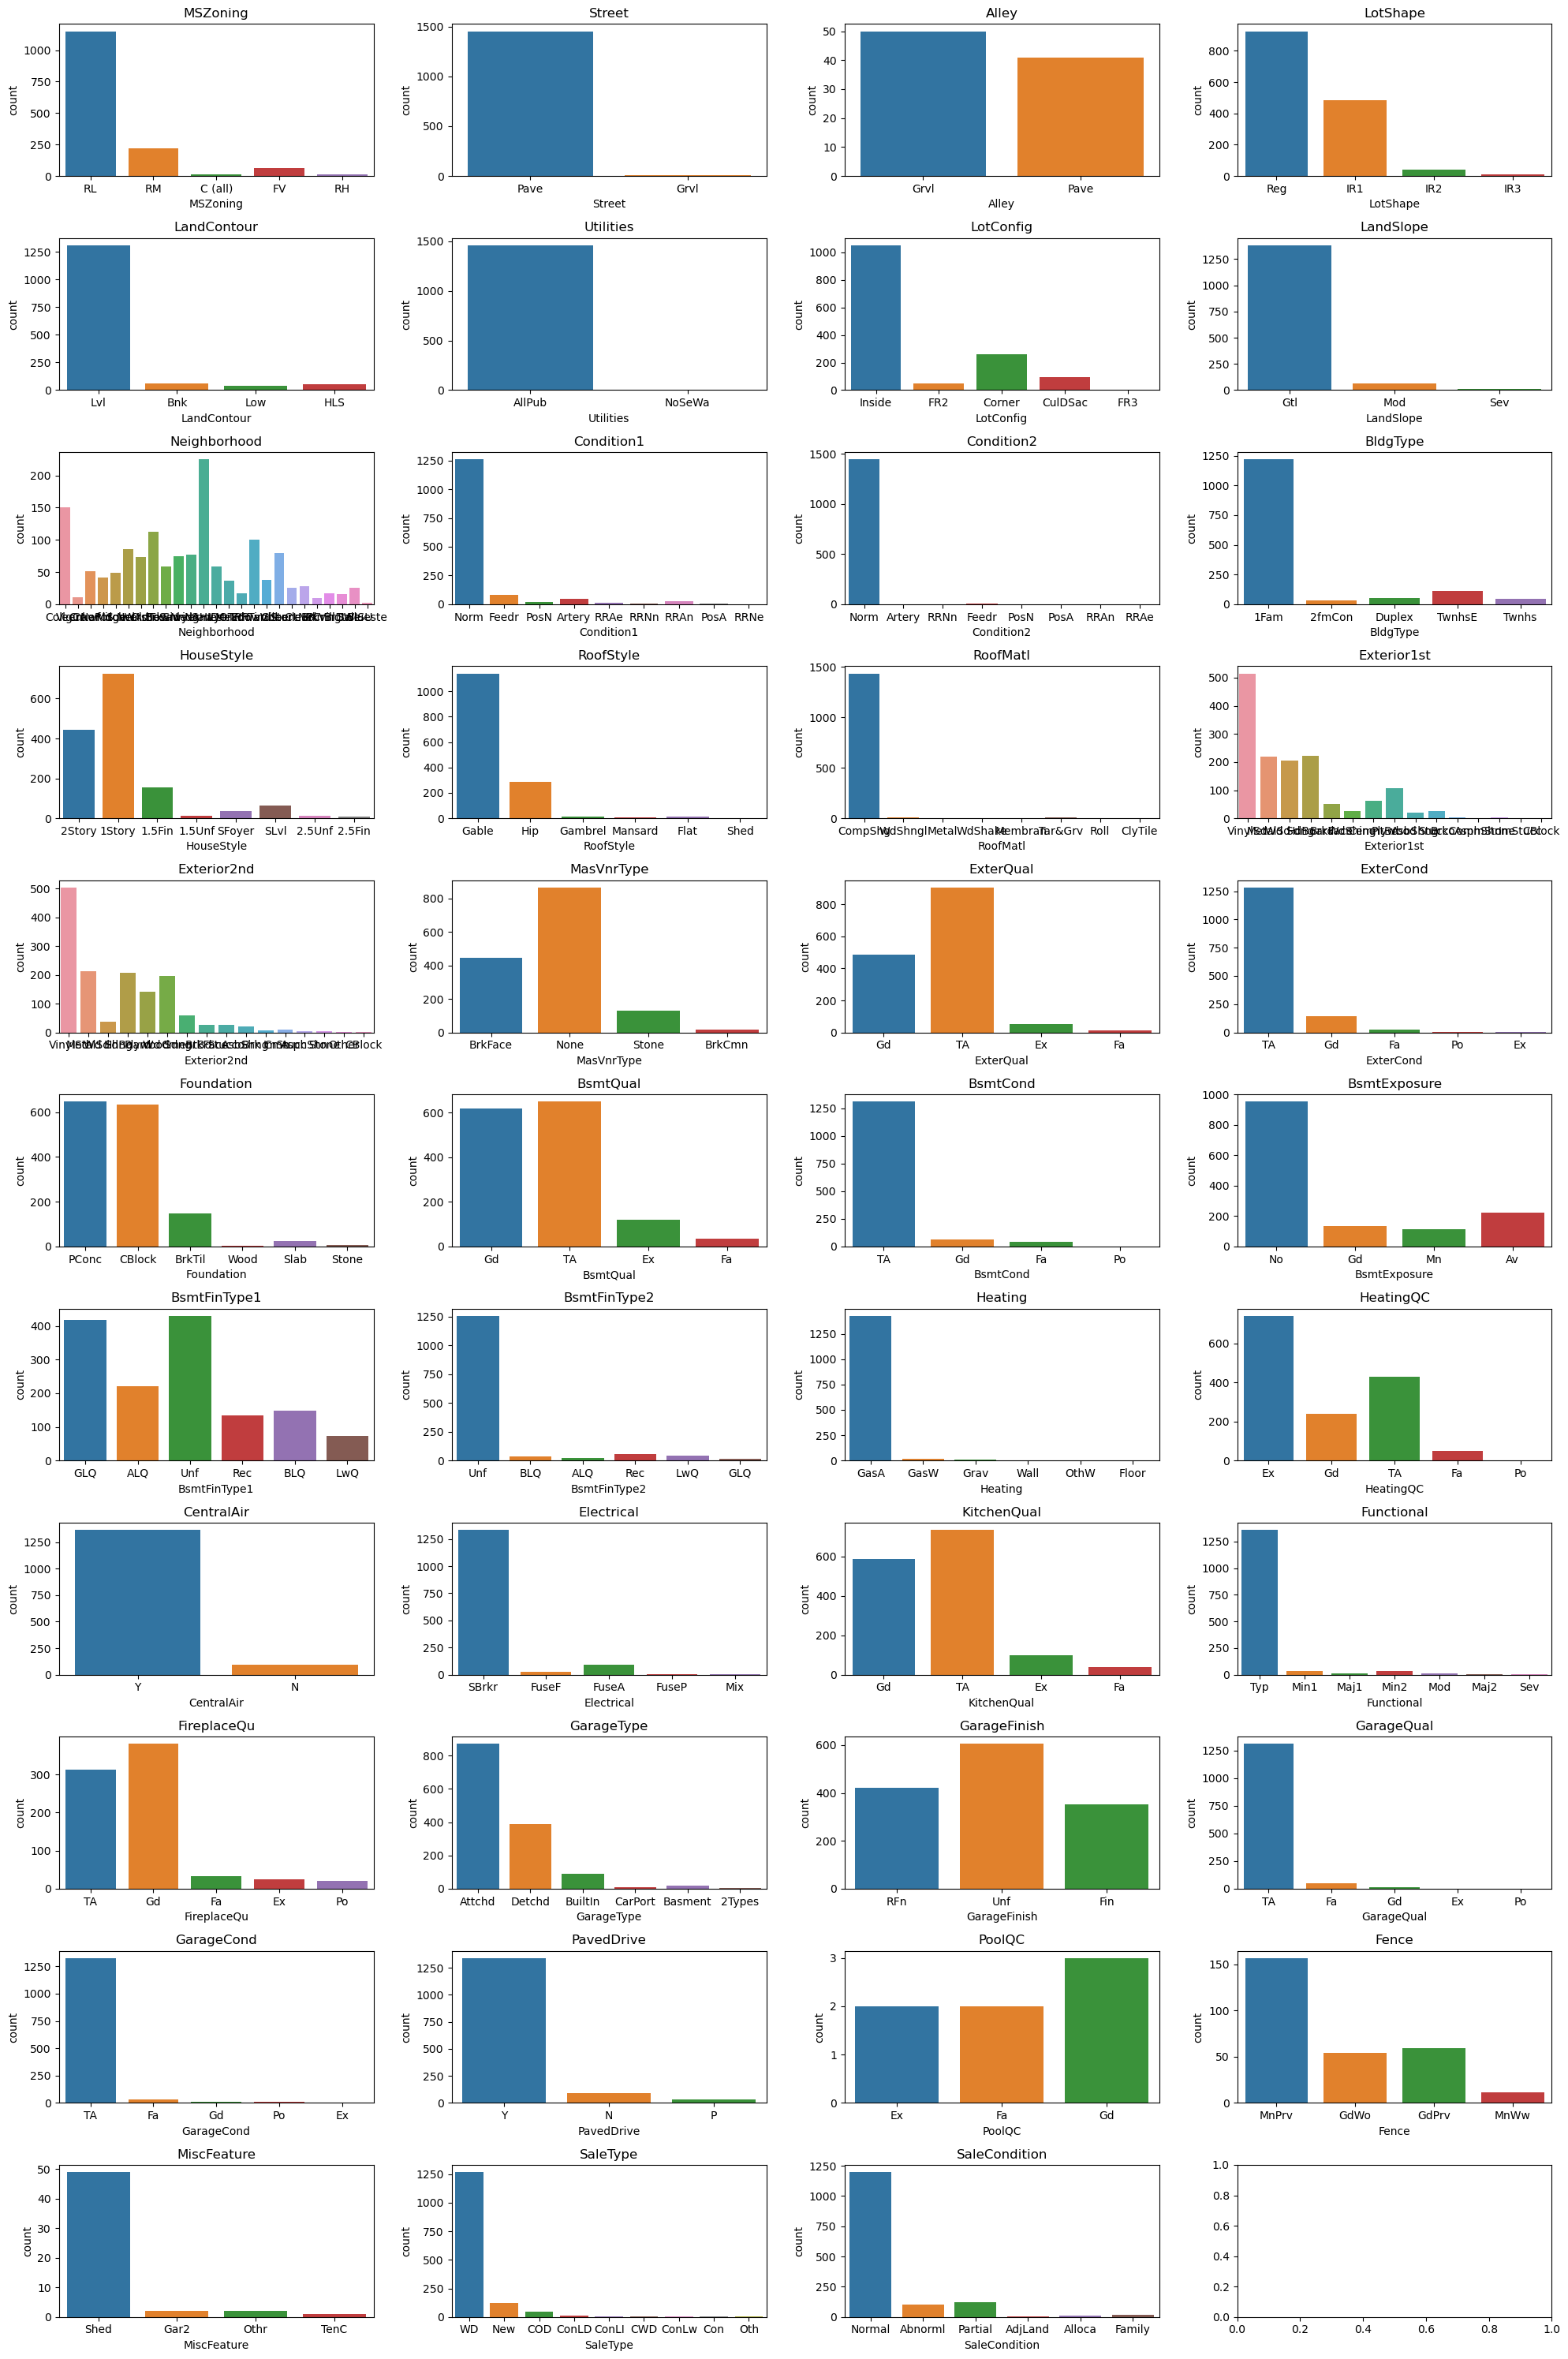

In [13]:
# analisando visualmente as variáveis categóricas, que podem se mostrar desnecessárias se possuem apenas uma informação

fig, axs = plt.subplots(nrows=11, ncols=4, figsize=(20, 30))
axs = axs.ravel()

for i, column in enumerate(colunas_categoricas):
    sns.countplot(x=column, data=treino, ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()

<AxesSubplot:>

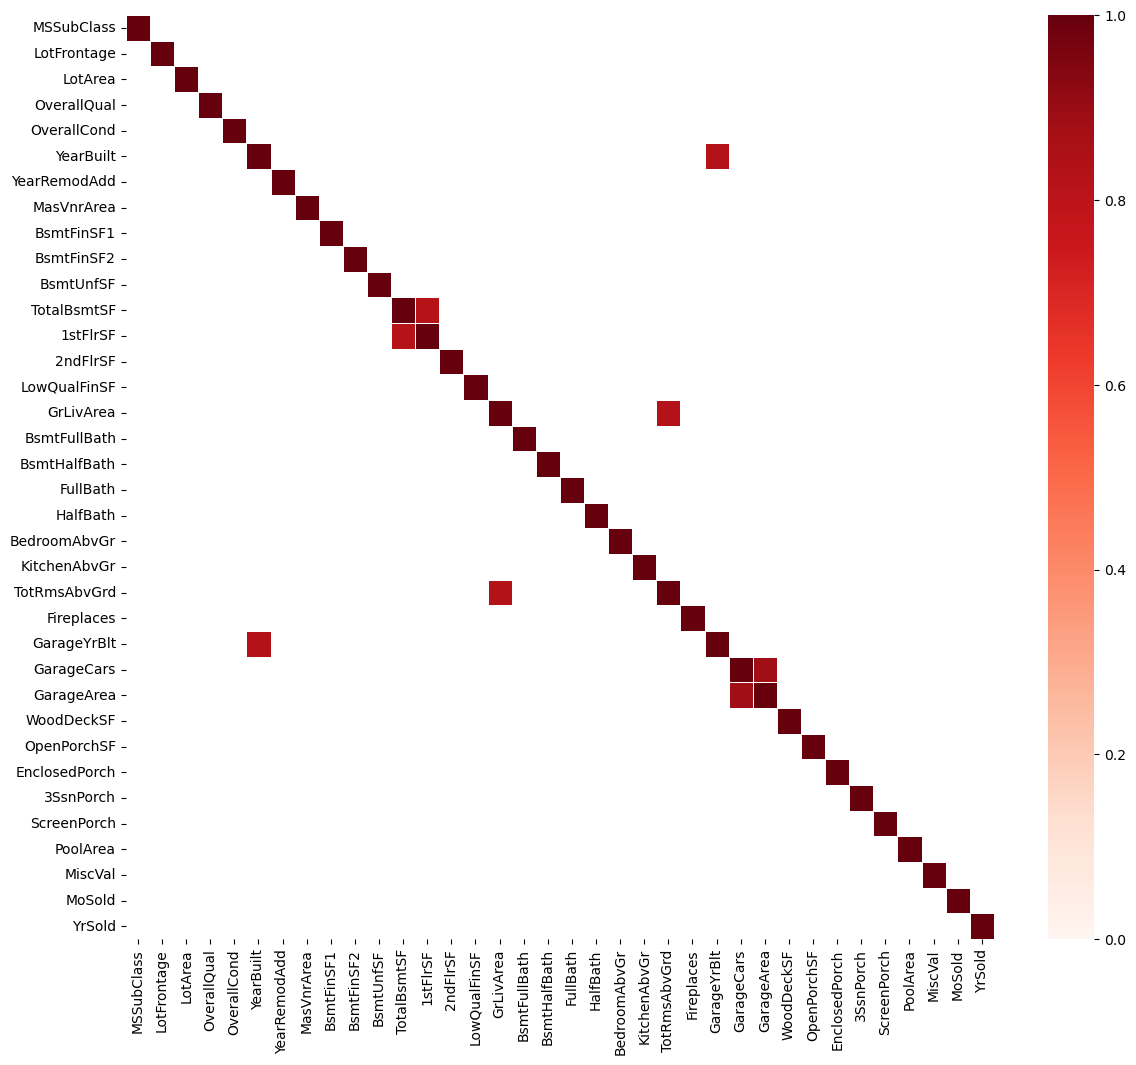

In [14]:
# construindo a matriz de correlação entre as variáveis do dataset

plt.figure(figsize=(14,12))
correlation = treino[colunas_numericas].corr()
sns.heatmap(correlation, mask = correlation < 0.8, linewidth=0.5, cmap='Reds', vmin=0)

In [15]:
# verificando quais são as colunas que possuem uma correlaçãoa cima de 0.8

alta_corr_colunas = []
for i in range(len(correlation.columns)):
    for j in range(i):
        if abs(correlation.iloc[i, j]) > 0.8:
            colname = correlation.columns[i]
            alta_corr_colunas.append(colname)

alta_corr_colunas

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']

<AxesSubplot:>

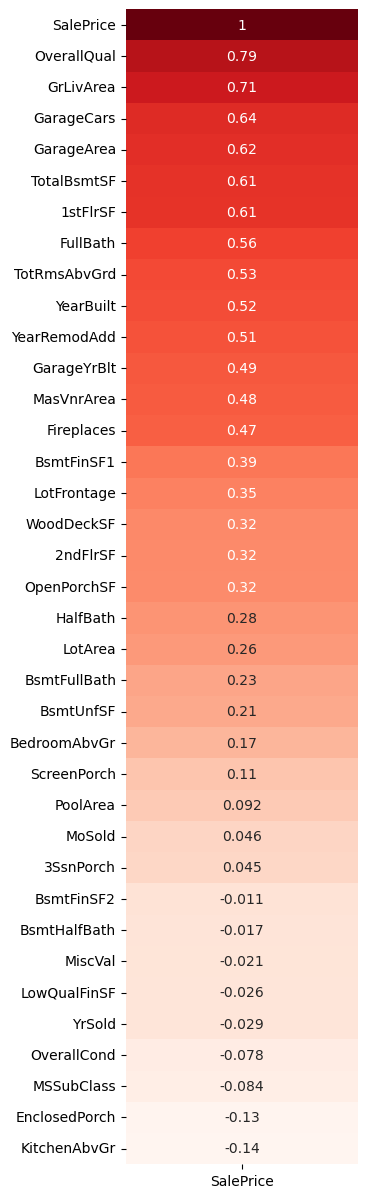

In [16]:
# elencando as variáveis que são mais correlacioandas com a variável alvo ('SalePrice')

correlation = treino[colunas_numericas + ['SalePrice']].corr()
target_correlation = correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False)
target_correlation

plt.figure(figsize=(3,15))
sns.heatmap(target_correlation, annot=True, cmap='Reds', cbar=False)

In [17]:
# verificando as variáveis que possuem uma correlação positiva em relação a variável alvo

target_positive_corr = list(target_correlation[target_correlation > 0 ].dropna().index)
target_positive_corr

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 '3SsnPorch']

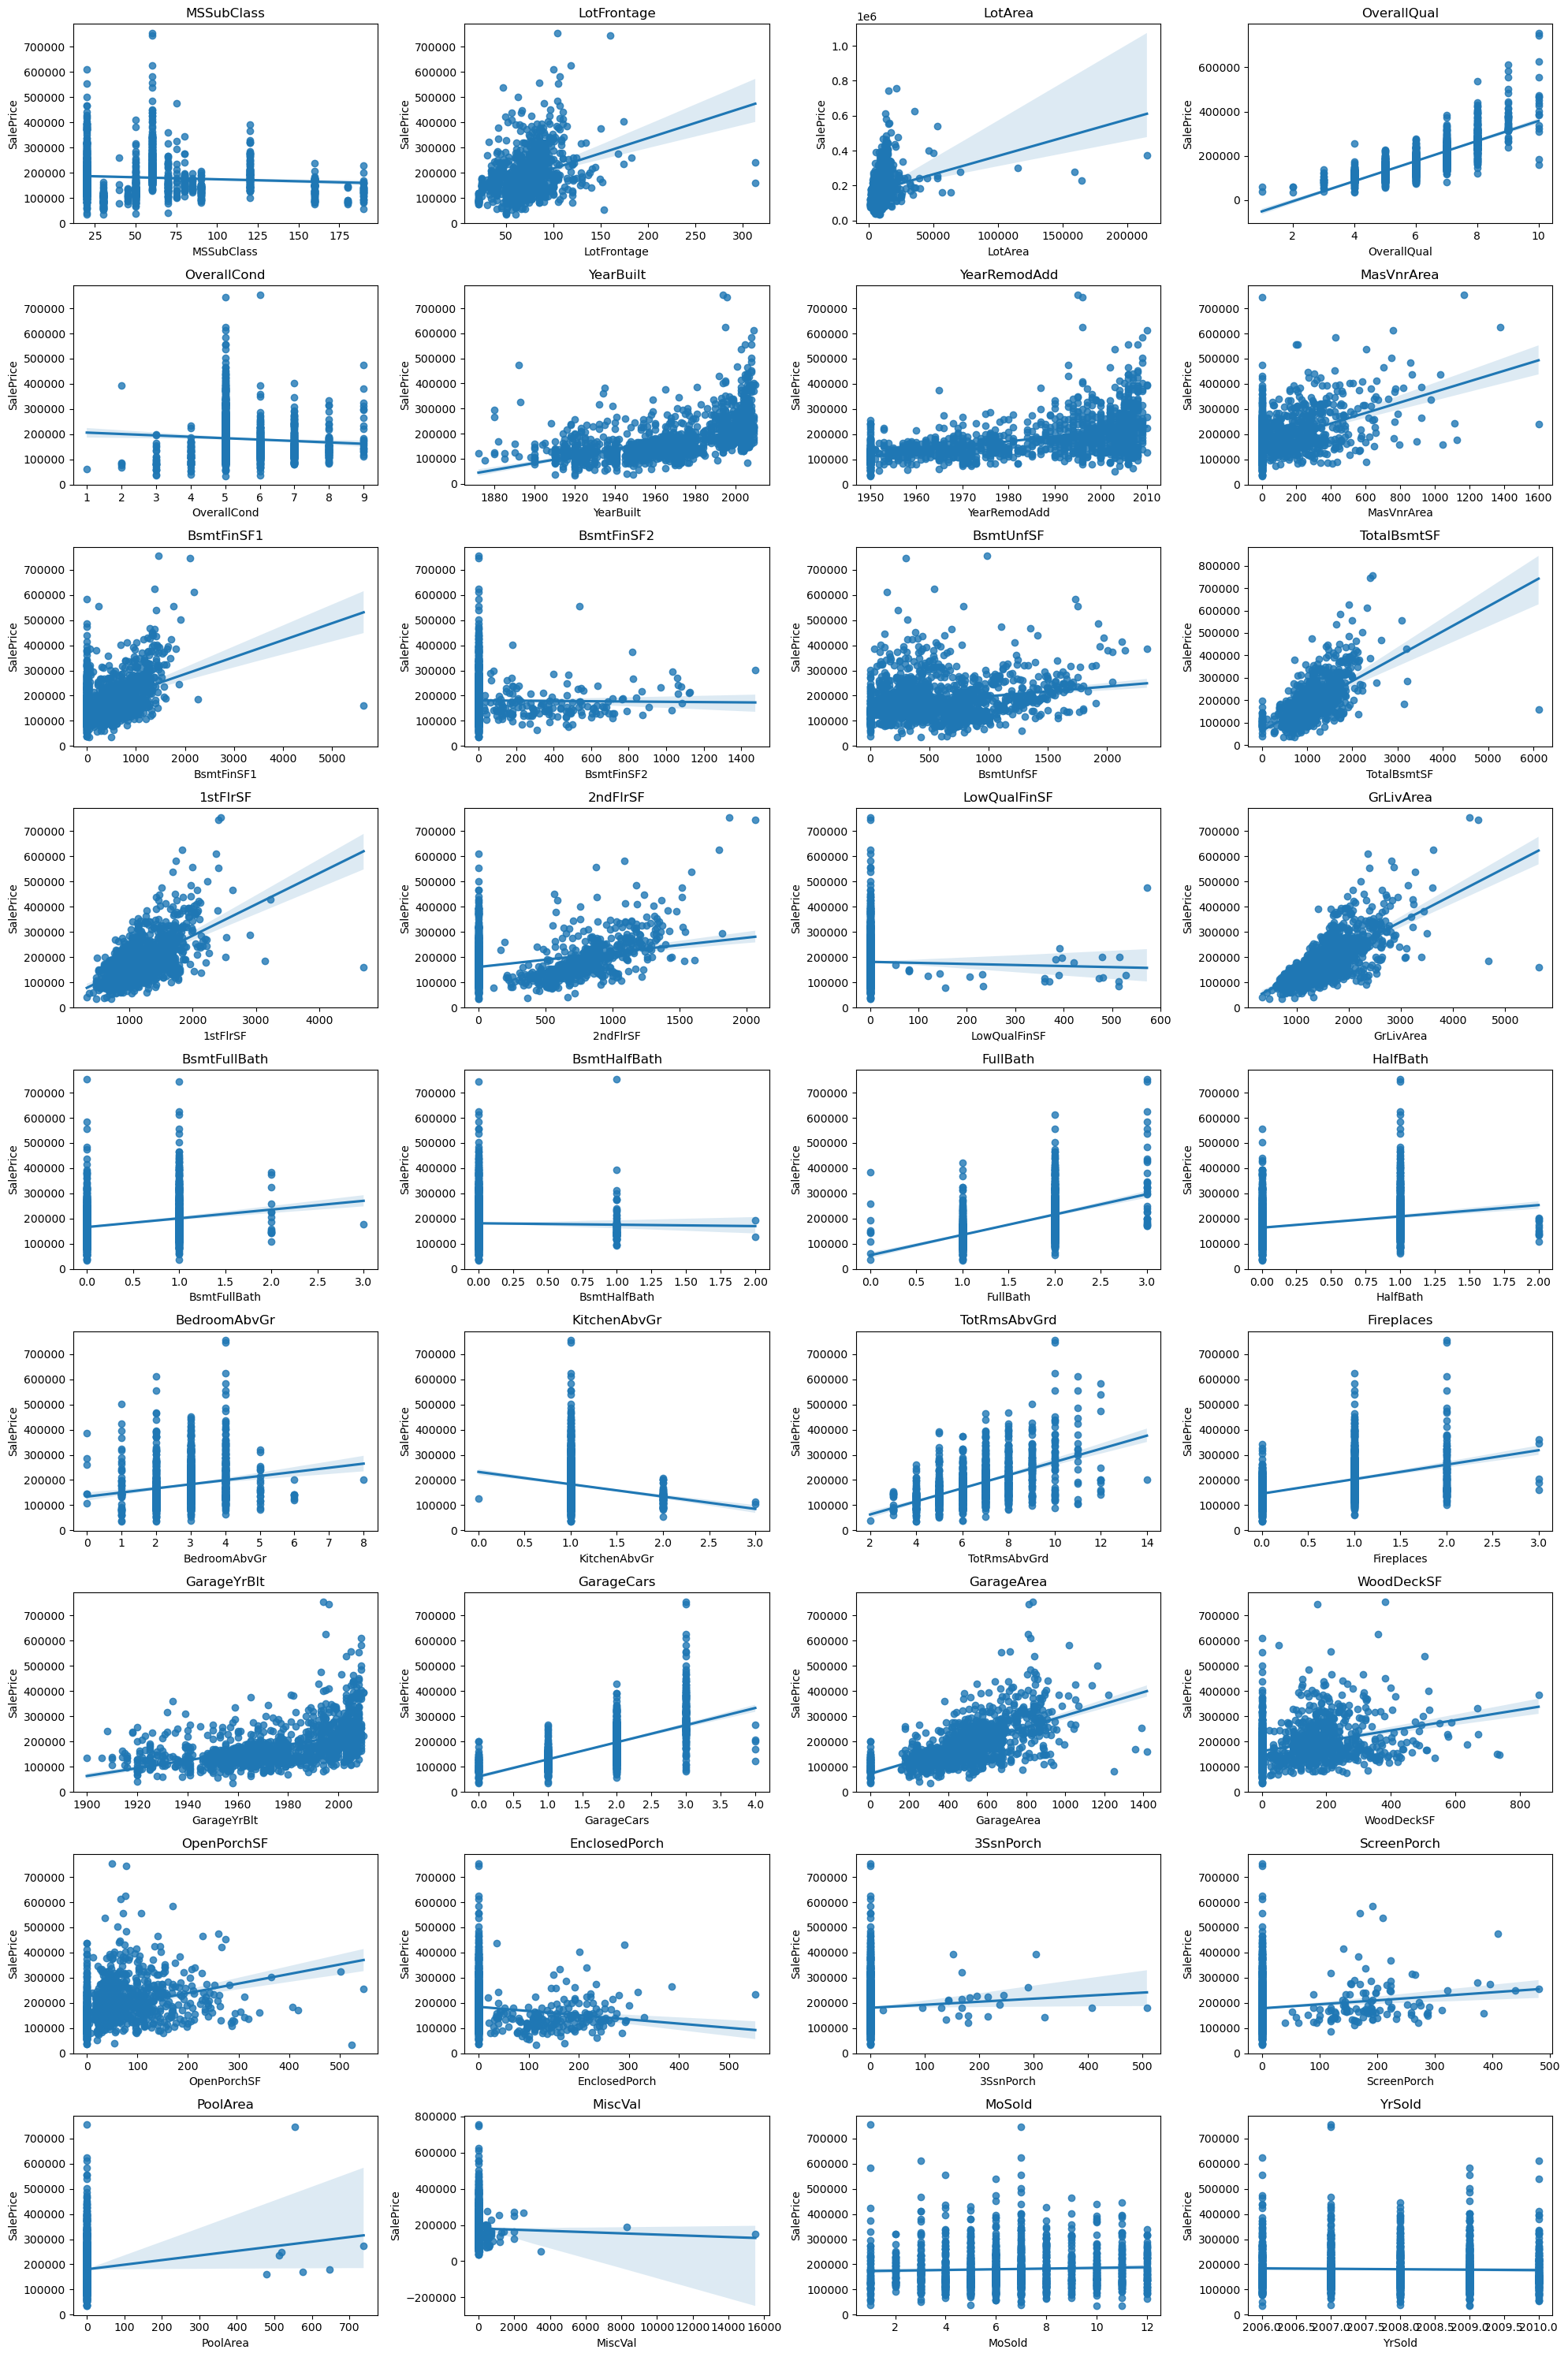

In [18]:
# utilizando o scatterplot para verificar visualmente correlação linear entre as variáveis de entrada e a variável alvo

fig, axs = plt.subplots(nrows=9, ncols=4, figsize=(20, 30))
axs = axs.ravel()

for i, column in enumerate(colunas_numericas):
    sns.regplot(data=treino, x=column, y='SalePrice', ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()

In [19]:
# acima verificamos que as colunas "MoSold" e "YrSold" não apresentam uma correlação significativa

sem_relevancia = ['MoSold', 'YrSold']

# Processamento dos dados

In [20]:
# para evitar o problema da multicolineridade, iremos retirar do dataset as variáveis que apresentam alta correlação (conforme identificamos anteriormente)

treino = treino.drop(alta_corr_colunas, axis=1)

In [22]:
# eliminando colunas com muitos valores ausentes

drop_columns = ['PoolQC', 'MiscFeature', 'Alley']
treino = treino.drop(drop_columns, axis=1)

In [26]:
# retirando as colunas que vimos ser nao relevantes em relação a correlação

treino = treino.drop(sem_relevancia, axis=1)

In [28]:
# verificando quais variáveis possuem dados muito enviesados

enviesado = pd.DataFrame()

for column in treino.columns:
  new_row = {
      'index': column,
      'count': len(treino[column].value_counts(normalize=True)),
      'max_normalize': treino[column].value_counts(normalize=True).max(),
      'values': list(treino[column].value_counts(normalize=True).sort_values(ascending=False).index)
      
  }
  enviesado = enviesado.append(new_row, ignore_index=True)

enviesado = enviesado.sort_values(by='max_normalize', ascending=False).set_index('index')
enviesado[enviesado['max_normalize'] > 0.9]

,count,max_normalize,values
index,,,
Utilities,2,0.999315,"[AllPub, NoSeWa]"
Street,2,0.995890,"[Pave, Grvl]"
PoolArea,8,0.995205,"[0, 512, 648, 576, 555, 480, 519, 738]"
Condition2,8,0.989726,"[Norm, Feedr, Artery, RRNn, PosN, PosA, RRAn, ..."
3SsnPorch,20,0.983562,"[0, 168, 144, 180, 216, 320, 407, 130, 140, 50..."
LowQualFinSF,24,0.982192,"[0, 80, 360, 473, 513, 234, 528, 572, 144, 392..."
RoofMatl,8,0.982192,"[CompShg, Tar&Grv, WdShngl, WdShake, Metal, Me..."
Heating,6,0.978082,"[GasA, GasW, Grav, Wall, OthW, Floor]"
MiscVal,21,0.964384,"[0, 400, 500, 700, 450, 600, 2000, 1200, 480, ..."


In [29]:
threshold = 0.95
enviasado_threshold = list(enviesado[enviesado['max_normalize'] >= threshold].index)
enviasado_threshold

['Utilities',
 'Street',
 'PoolArea',
 'Condition2',
 '3SsnPorch',
 'LowQualFinSF',
 'RoofMatl',
 'Heating',
 'MiscVal',
 'GarageCond',
 'KitchenAbvGr',
 'GarageQual']

In [30]:
# retirando as variáveis altamente enviesadas

treino = treino.drop(enviasado_threshold, axis=1)

In [33]:
# substituindo os valores ordinais ausentes por NA

ordinal = ['GarageType','GarageFinish','BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','FireplaceQu','Fence', 'KitchenQual', 'HeatingQC','ExterQual','ExterCond']
treino[ordinal] = treino[ordinal].fillna('NA')

In [34]:
null_cols4 = treino.isnull().sum()
null_cols4 = null_cols4[null_cols4 > 0].sort_values(ascending=False)
print(null_cols4)

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
dtype: int64


In [36]:
# verificando os dados ausentes nas variáveis numéricas

numbers_cols = list(treino.select_dtypes(exclude='object').columns)
missing_numbers = treino[numbers_cols].isnull().sum()
missing_numbers[missing_numbers > 0 ]

LotFrontage    259
MasVnrArea       8
dtype: int64

In [37]:
treino[missing_numbers[missing_numbers > 0 ].index].describe()

,LotFrontage,MasVnrArea
count,1201.000000,1452.000000
mean,70.049958,103.685262
std,24.284752,181.066207
min,21.000000,0.000000
25%,59.000000,0.000000
50%,69.000000,0.000000
75%,80.000000,166.000000
max,313.000000,1600.000000


In [38]:
# substituindo os valores ausentes nas colunas

LotFrontage_mean = treino['LotFrontage'].mean()
treino['LotFrontage'] = treino['LotFrontage'].fillna(LotFrontage_mean)

MasVnrArea_median = treino['MasVnrArea'].median()
treino['MasVnrArea'] = treino['MasVnrArea'].fillna(MasVnrArea_median)

In [40]:
from scipy import stats

# Escolhendo um threshold para o Z-score
threshold = 10

# selecionando apenas as colunas numéricas do dataset
numeric_cols = treino.select_dtypes(include=[np.number]).columns.tolist()

# calculando o Z-score para cada coluna numérica do dataset
z_scores = np.abs(stats.zscore(treino[numeric_cols]))

# encontrando os índices dos pontos com Z-score acima do threshold
outlier_indices = np.where(z_scores > threshold)

# removendo os outliers
treino_tratado = treino[(z_scores <= threshold).all(axis=1)]


In [43]:
# subtituindo os valores ausentes das variáveis categóricas pela ocorrência mais frequente. O notebook no qual me inspirei informou que as variáveis categóricas variam por bairro
# primeiro encontramos a moda

categ = ["MasVnrType", "MSZoning", "Exterior1st", "Exterior2nd", "SaleType", "Electrical", "Functional"]
treino_tratado[categ].mode()

,MasVnrType,MSZoning,Exterior1st,Exterior2nd,SaleType,Electrical,Functional
0,None,RL,VinylSd,VinylSd,WD,SBrkr,Typ


In [44]:
# agrupando "treino" por bairros (coluna "Neighborhood") e, para cada bairro, identificando o valor mais frequente (moda) da variável "Exterior1st"

treino_tratado.groupby('Neighborhood')['Exterior1st'].apply(lambda x: x.mode()[0]).reset_index()

,Neighborhood,Exterior1st
0,Blmngtn,VinylSd
1,Blueste,MetalSd
2,BrDale,HdBoard
3,BrkSide,Wd Sdng
4,ClearCr,Wd Sdng
5,CollgCr,VinylSd
6,Crawfor,Wd Sdng
7,Edwards,MetalSd
8,Gilbert,VinylSd
9,IDOTRR,Wd Sdng


In [45]:
# preenchendo os valores ausentes nas colunas listadas em categ no DataFrame treino com a moda de cada coluna agrupada por bairro.

treino_tratado[categ] = treino.groupby("Neighborhood")[categ].transform(lambda x: x.fillna(x.mode()[0]))

In [47]:
# criando um mapa de ordenação para variáveis onde isso faz sentido

ordinal_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}

In [48]:
# ordenando as variáveis 

ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual', 'FireplaceQu']
for col in ord_col:
    treino_tratado[col] = treino_tratado[col].map(ordinal_map)
    
fin_col = ['BsmtFinType1','BsmtFinType2']
for col in fin_col:
    treino_tratado[col] = treino_tratado[col].map(fintype_map)

treino_tratado['BsmtExposure'] = treino_tratado['BsmtExposure'].map(expose_map)
treino_tratado['Fence'] = treino_tratado['Fence'].map(fence_map)

# Feature enginnering

In [49]:
# criamndo algumas variáveis adicionais, que poderão ser úteis nos modelos de Machine Learning

treino_tratado['TotalLot'] = treino_tratado['LotFrontage'] + treino_tratado['LotArea']
treino_tratado['TotalBsmtFin'] = treino_tratado['BsmtFinSF1'] + treino_tratado['BsmtFinSF2']
treino_tratado['TotalSF'] = treino_tratado['TotalBsmtSF'] + treino_tratado['2ndFlrSF']
treino_tratado['TotalBath'] = treino_tratado['FullBath'] + treino_tratado['HalfBath']
treino_tratado['TotalPorch'] = treino_tratado['OpenPorchSF'] + treino_tratado['EnclosedPorch'] + treino_tratado['ScreenPorch']

In [50]:
# criando uma nova variável com a diferença entre o ano de reforma ("YearRemodAdd") e o ano de construção ("YearBuilt") para cada casa no dataset.

treino_tratado['BuildToRemod'] = treino_tratado['YearRemodAdd']	- treino_tratado['YearBuilt'] 
treino_tratado['BuildToRemod'].value_counts().sort_values(ascending=False)

0      761
1      215
30      21
2       14
9       14
      ... 
121      1
115      1
95       1
98       1
84       1
Name: BuildToRemod, Length: 109, dtype: int64

In [51]:
# algumas colunas possuem dados binários de ausência/presença

columns = ['MasVnrArea','TotalBsmtFin','TotalBsmtSF','2ndFlrSF','WoodDeckSF','TotalPorch', 'BuildToRemod']

for column in columns:
    treino_tratado[column +'_bin'] = treino_tratado[column].apply(lambda x: 1 if x > 0 else 0)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

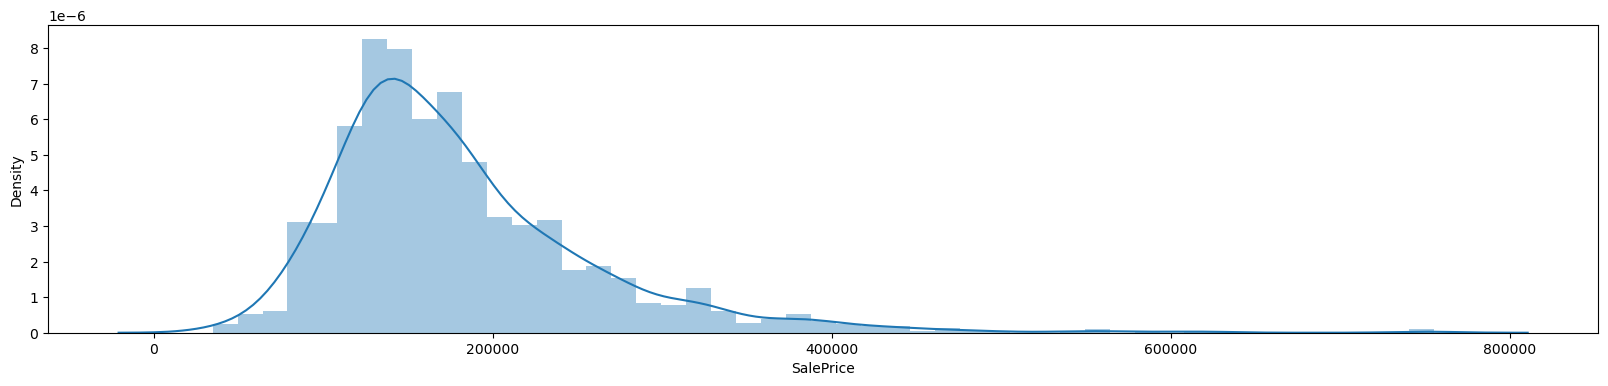

In [52]:
# verificando se a variável alvo é assimétrica

plt.figure(figsize=(20,4))
sns.distplot(treino['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

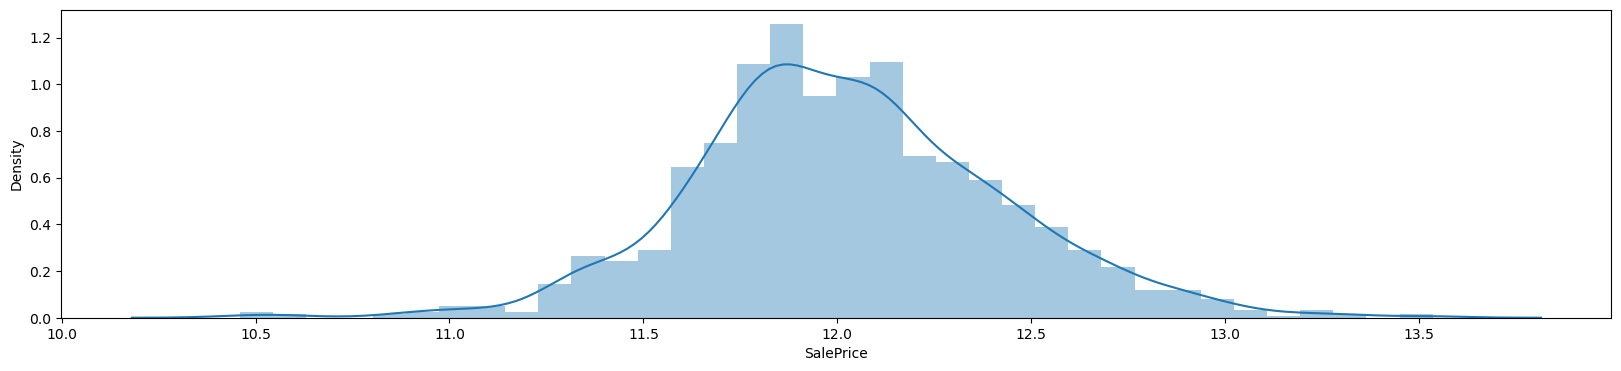

In [53]:
# como vimos que a distribuição da variável é assimétrica à direta, fizemos uma transformação log

treino_tratado["SalePrice"] = np.log(treino_tratado['SalePrice'])
plt.figure(figsize=(20,4))
sns.distplot(treino_tratado['SalePrice'])

# Machine Learning

In [54]:
!pip install catboost

In [55]:
!pip install xgboost

In [56]:
!pip install lightgbm

In [57]:
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import  OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import time

from sklearn.model_selection import cross_validate, RepeatedKFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [58]:
# definindo as variáveis de entrada e a alvo

X = treino_tratado.drop('SalePrice', axis=1)
y = treino_tratado['SalePrice']

In [59]:
len(X.columns)

71

In [60]:
# separando as variáveis numéricas

numbers_cols = list(X.select_dtypes(exclude='object').columns)
X[numbers_cols].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,TotalBath,TotalPorch,BuildToRemod,MasVnrArea_bin,TotalBsmtFin_bin,TotalBsmtSF_bin,2ndFlrSF_bin,WoodDeckSF_bin,TotalPorch_bin,BuildToRemod_bin
0,60,65.0,8450,7,5,2003,2003,196.0,4,3,...,3,61,0,1,1,1,1,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,3,3,...,2,0,0,0,1,1,0,1,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,4,3,...,3,42,1,1,1,1,1,0,1,1
3,70,60.0,9550,7,5,1915,1970,0.0,3,3,...,1,307,55,0,1,1,1,0,1,1
4,60,84.0,14260,8,5,2000,2000,350.0,4,3,...,3,84,0,1,1,1,1,1,1,0


In [61]:
# separando as variáveis categóricas

object_cols = list(X.select_dtypes(include='object').columns)
X[object_cols].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,MasVnrType,Foundation,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,BrkFace,PConc,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,...,None,CBlock,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,BrkFace,PConc,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,...,None,BrkTil,Y,SBrkr,Typ,Detchd,Unf,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,...,BrkFace,PConc,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal


In [62]:
# criando uma lista com os algoritmos que serao utilizados

algorithms = {
    'Linear': LinearRegression(),
    'KNN' : KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGB': XGBRegressor(),
    'LGBM': LGBMRegressor(),
    'Cat': CatBoostRegressor(loss_function='RMSE', logging_level='Silent')
}

In [63]:
# criando um objeto de preprocessamento que aplica one-hot encoding para colunas categóricas e RobustScaler para colunas numéricas

preprocessor = ColumnTransformer(
    transformers=[
        ('one', OneHotEncoder(handle_unknown = 'ignore'), object_cols),
        ('robust', RobustScaler(), numbers_cols)
    ])

In [64]:
def test_algorithms(X,y):
  result = pd.DataFrame()
  cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
      
  scoring = {'MAE': 'neg_mean_absolute_error',
            'MSE': 'neg_mean_squared_error',
            'RMSE': 'neg_root_mean_squared_error',
            'R2': 'r2'}

  for key, algorithm in algorithms.items():
    start_time = time.time()
    print(f'{key} - ', end = '')
    model = make_pipeline(preprocessor, algorithm)

    cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_estimator =True, error_score='raise')

    new_row = {
        'Algorithm': key,
        'MAE': np.mean(cv_results['test_MAE']),
        'MSE': np.mean(cv_results['test_MSE']),
        'RMSE': np.mean(cv_results['test_RMSE']),
        'R2': np.mean(cv_results['test_R2']),
        'model': cv_results['estimator'][0],
        'run_time': (time.time() - start_time) / 60
      }

    result = result.append(new_row, ignore_index=True)
    print(f'Tempo: {(time.time() - start_time) / 60} min(s).')
  return result.set_index('Algorithm', drop=True).sort_values(by='RMSE', ascending=False)

In [65]:
result = test_algorithms(X,y)
result

Linear - Tempo: 0.011963113149007162 min(s).
KNN - Tempo: 0.01543051799138387 min(s).
Decision Tree - Tempo: 0.02330334981282552 min(s).
Random Forest - Tempo: 0.547168250878652 min(s).
XGB - Tempo: 0.137242591381073 min(s).
LGBM - Tempo: 0.10986765623092651 min(s).
Cat - Tempo: 1.4774204611778259 min(s).


,MAE,MSE,RMSE,R2,model,run_time
Algorithm,,,,,,
Cat,-0.079206,-1.440792e-02,-1.194772e-01,9.092226e-01,"(ColumnTransformer(transformers=[('one', OneHo...",1.477420
LGBM,-0.087710,-1.698531e-02,-1.299208e-01,8.928889e-01,"(ColumnTransformer(transformers=[('one', OneHo...",0.109809
XGB,-0.094993,-1.964665e-02,-1.397425e-01,8.761611e-01,"(ColumnTransformer(transformers=[('one', OneHo...",0.137176
Random Forest,-0.095042,-2.002233e-02,-1.410734e-01,8.740359e-01,"(ColumnTransformer(transformers=[('one', OneHo...",0.547114
Decision Tree,-0.143005,-4.242601e-02,-2.054052e-01,7.323832e-01,"(ColumnTransformer(transformers=[('one', OneHo...",0.023247
KNN,-0.158157,-5.434290e-02,-2.325991e-01,6.583130e-01,"(ColumnTransformer(transformers=[('one', OneHo...",0.015431
Linear,-644455.190287,-1.732180e+14,-7.153317e+06,-1.123069e+15,"(ColumnTransformer(transformers=[('one', OneHo...",0.011963


# Hiperparâmetros

In [66]:
cat = CatBoostRegressor(loss_function='RMSE', logging_level='Silent')
cat

In [67]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [68]:
start = time.time()
parametros = {
    'n_estimators' : [100, 300, 500, 1000, 1300, 1600],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'l2_leaf_reg' : [0.001, 0.01, 0.1],
    'random_strength' : [0.25, 0.5 ,1],
    'max_depth' : [3, 6, 9],
    'min_child_samples' : [2, 5, 10, 15, 20],
    'rsm' : [0.5, 0.7, 0.9],
}

catboost = RandomizedSearchCV(estimator = cat, param_distributions = parametros, n_iter = 100, scoring = 'neg_root_mean_squared_error', cv = 5)
model = make_pipeline(preprocessor, catboost)
catboost_search = model.fit(X_train, y_train)

# CatBoost with tuned hyperparams
run_time = (time.time() - start) / 60
run_time

65.5873499751091

In [69]:
melhores_parametros = catboost_search[1].best_params_
melhores_parametros

{'rsm': 0.5,
 'random_strength': 0.25,
 'n_estimators': 1300,
 'min_child_samples': 15,
 'max_depth': 6,
 'learning_rate': 0.01,
 'l2_leaf_reg': 0.1}

In [70]:
algorithms = {
    'Cat otimizado': CatBoostRegressor(loss_function='RMSE', logging_level='Silent', rsm= 0.5, random_strength=0.5, n_estimators=1600, min_child_samples=5, max_depth=6, learning_rate=0.01,  l2_leaf_reg = 0.1)
}

In [71]:
algorithms

{'Cat otimizado': <catboost.core.CatBoostRegressor at 0x21b8a017640>}

In [72]:
otimized_result = test_algorithms(X,y)

Cat otimizado - Tempo: 2.190659201145172 min(s).


In [73]:
otimized_result

,MAE,MSE,RMSE,R2,model,run_time
Algorithm,,,,,,
Cat otimizado,-0.080126,-0.014684,-0.120697,0.907422,"(ColumnTransformer(transformers=[('one', OneHo...",2.190554


In [74]:
result = result.append(otimized_result)
result

,MAE,MSE,RMSE,R2,model,run_time
Algorithm,,,,,,
Cat,-0.079206,-1.440792e-02,-1.194772e-01,9.092226e-01,"(ColumnTransformer(transformers=[('one', OneHo...",1.477420
LGBM,-0.087710,-1.698531e-02,-1.299208e-01,8.928889e-01,"(ColumnTransformer(transformers=[('one', OneHo...",0.109809
XGB,-0.094993,-1.964665e-02,-1.397425e-01,8.761611e-01,"(ColumnTransformer(transformers=[('one', OneHo...",0.137176
Random Forest,-0.095042,-2.002233e-02,-1.410734e-01,8.740359e-01,"(ColumnTransformer(transformers=[('one', OneHo...",0.547114
Decision Tree,-0.143005,-4.242601e-02,-2.054052e-01,7.323832e-01,"(ColumnTransformer(transformers=[('one', OneHo...",0.023247
KNN,-0.158157,-5.434290e-02,-2.325991e-01,6.583130e-01,"(ColumnTransformer(transformers=[('one', OneHo...",0.015431
Linear,-644455.190287,-1.732180e+14,-7.153317e+06,-1.123069e+15,"(ColumnTransformer(transformers=[('one', OneHo...",0.011963
Cat otimizado,-0.080126,-1.468410e-02,-1.206967e-01,9.074219e-01,"(ColumnTransformer(transformers=[('one', OneHo...",2.190554


In [75]:
final_model = result.loc['Cat otimizado']['model']
final_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'LotShape',
                                                   'LandContour', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'Foundation',
                                                   'CentralAir', 'Electrical',
                                                   'Functional', 'GarageType',
                                                   'Gar...
                                                 

# Pipeline

In [76]:
teste = pd.read_csv('test.csv')
X_test = teste.drop('Id',axis=1)

In [77]:
drop_columns = ['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'PoolQC', 'MiscFeature', 'Alley', 'MoSold', 'YrSold', 'Utilities', 'Street', 'PoolArea', 'Condition2', '3SsnPorch', 'LowQualFinSF', 'RoofMatl', 'Heating', 'MiscVal', 'GarageCond']
X_test = X_test.drop(drop_columns, axis=1)

In [78]:
missing_values = X_test.isnull().sum()
missing_values[missing_values > 0 ].sort_values(ascending=False)

Fence           1169
FireplaceQu      730
LotFrontage      227
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType2      42
BsmtFinType1      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
GarageCars         1
BsmtUnfSF          1
KitchenQual        1
TotalBsmtSF        1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [79]:
# preenchendo os valores ausentes das variáveis categórias com NA

ordinal = ['GarageType','GarageFinish','BsmtFinType2','BsmtExposure','BsmtFinType1','GarageQual','BsmtCond','BsmtQual','FireplaceQu','Fence', 'KitchenQual', 'HeatingQC','ExterQual','ExterCond']
X_test[ordinal] = X_test[ordinal].fillna('NA')

In [80]:
# preenchendo os valores faltantes nas colunas categóricas do conjunto de teste "X_test" usando os valores mais frequentes (moda) com base nos vizinhos

cat_features = ["MasVnrType", "MSZoning", "Exterior1st", "Exterior2nd", "SaleType", "Electrical", "Functional"]
for col in cat_features:
  train_mode = treino.groupby('Neighborhood')[col].apply(lambda x: x.mode()[0]).reset_index()
  mode_dict = dict(zip(train_mode['Neighborhood'], train_mode[col]))
  X_test[col] = teste.apply(lambda row: mode_dict[row['Neighborhood']] if pd.isnull(row[col]) else row[col], axis=1)

In [81]:
# Numerical Features
X_test['LotFrontage'] = X_test['LotFrontage'].fillna(LotFrontage_mean)
X_test['MasVnrArea'] = X_test['MasVnrArea'].fillna(MasVnrArea_median)

In [82]:
missing_values = X_test.isnull().sum()
missing_values[missing_values > 0 ].sort_values(ascending=False)

BsmtFullBath    2
BsmtHalfBath    2
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
GarageCars      1
dtype: int64

In [83]:
missing_columns = list(missing_values[missing_values > 0 ].index)

In [84]:
treino[missing_columns]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageCars
0,706,0,150,856,1,0,2
1,978,0,284,1262,0,1,2
2,486,0,434,920,1,0,2
3,216,0,540,756,1,0,3
4,655,0,490,1145,1,0,3
...,...,...,...,...,...,...,...
1455,0,0,953,953,0,0,2
1456,790,163,589,1542,1,0,2
1457,275,0,877,1152,0,0,1
1458,49,1029,0,1078,1,0,1


In [85]:
ordinal_numbers = ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']
for col in ordinal_numbers:
  X_test[col] = X_test[col].fillna(0)

In [86]:
numerical_features = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
treino[numerical_features].describe()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,443.639726,46.549315,567.240411,1057.429452
std,456.098091,161.319273,441.866955,438.705324
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,223.000000,795.750000
50%,383.500000,0.000000,477.500000,991.500000
75%,712.250000,0.000000,808.000000,1298.250000
max,5644.000000,1474.000000,2336.000000,6110.000000


In [87]:
treino['BsmtFinSF1'].mean()

443.6397260273973

In [88]:
for col in numerical_features:
  median = treino[col].median()
  X_test[col] = X_test[col].fillna(median)

In [89]:
ordinal_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}

ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual', 'FireplaceQu']
for col in ord_col:
    X_test[col] = X_test[col].map(ordinal_map)
    
fin_col = ['BsmtFinType1','BsmtFinType2']
for col in fin_col:
    X_test[col] = X_test[col].map(fintype_map)

X_test['BsmtExposure'] = X_test['BsmtExposure'].map(expose_map)
X_test['Fence'] = X_test['Fence'].map(fence_map)

In [90]:
# criando as novas variáveis

X_test['TotalLot'] = X_test['LotFrontage'] + X_test['LotArea']
X_test['TotalBsmtFin'] = X_test['BsmtFinSF1'] + X_test['BsmtFinSF2']
X_test['TotalSF'] = X_test['TotalBsmtSF'] + X_test['2ndFlrSF']
X_test['TotalBath'] = X_test['FullBath'] + X_test['HalfBath']
X_test['TotalPorch'] = X_test['OpenPorchSF'] + X_test['EnclosedPorch'] + X_test['ScreenPorch']

X_test['BuildToRemod'] = X_test['YearRemodAdd']	- X_test['YearBuilt'] 
X_test['BuildToRemod'].value_counts().sort_values(ascending=False)

columns = ['MasVnrArea','TotalBsmtFin','TotalBsmtSF','2ndFlrSF','WoodDeckSF','TotalPorch', 'BuildToRemod']

for column in columns:
    X_test[column +'_bin'] = X_test[column].apply(lambda x: 1 if x > 0 else 0)

In [91]:
X_test

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,TotalBath,TotalPorch,BuildToRemod,MasVnrArea_bin,TotalBsmtFin_bin,TotalBsmtSF_bin,2ndFlrSF_bin,WoodDeckSF_bin,TotalPorch_bin,BuildToRemod_bin
0,20,RH,80.0,11622,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,1,120,0,0,1,1,0,1,1,0
1,20,RL,81.0,14267,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,2,36,0,1,1,1,0,1,1,0
2,60,RL,74.0,13830,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,3,34,1,0,1,1,1,1,1,1
3,60,RL,78.0,9978,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,3,36,0,1,1,1,1,1,1,0
4,120,RL,43.0,5005,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,2,226,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,2,0,0,0,0,1,1,0,0,0
1455,160,RM,21.0,1894,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,2,24,0,0,1,1,1,0,1,0
1456,20,RL,160.0,20000,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,1,0,36,0,1,1,0,1,0,1
1457,85,RL,62.0,10441,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,1,32,0,0,1,1,0,1,1,0


# Predição

In [92]:
pred = np.exp(final_model.predict(X_test))

In [93]:
# criando uma série de dados contendo as previsões de preços de venda para as casas no conjunto de teste, associando cada previsão à casa correspondente usando a coluna "Id".

sub = pd.Series(pred, index = teste['Id'], name='SalePrice')

In [94]:
name = 'CatBoost'
path = 'predict_model_2.csv'
sub.to_csv(path, header=True)